In [354]:
import pandas as pd
import numpy as np
## Load the data into a DataFrame
df = pd.read_csv('datasets/challenge-dataset.csv')
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [355]:
df2 = pd.read_csv('datasets/ranking-submission.csv')
df2.head()

,world_rank,university_name,total_score
0,1,California Institute of Technology,NaN
1,2,University of Oxford,NaN
2,3,Stanford University,NaN
3,4,University of Cambridge,NaN
4,5,Massachusetts Institute of Technology,NaN


In [356]:
for x in df.columns:
    print df[x].unique()

['1' '2' '3' '4' '5' '6' '8' '9' '10' '11' '12' '13' '14' '15' '17' '18'
 '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '32' '33' '34'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '47' '48' '49' '51' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '63' '64' '65' '66' '67' '68' '71'
 '72' '73' '75' '76' '77' '78' '79' '81' '83' '85' '86' '87' '88' '89' '90'
 '93' '94' '95' '98' '99' '100' '101' '102' '103' '104' '105' '106' '107'
 '109' '111' '112' '114' '115' '117' '118' '119' '120' '122' '124' '127'
 '128' '129' '130' '132' '135' '136' '137' '138' '139' '140' '142' '143'
 '144' '145' '147' '149' '151' '152' '155' '156' '158' '159' '161' '163'
 '164' '165' '167' '168' '170' '171' '172' '173' '174' '177' '178' '181'
 '182' '183' '184' '185' '186' '187' '189' '190' '193' '195' '196' '197'
 '199' '7' '16' '31' '44' '45' '46' '62' '69' '70' '74' '80' '84' '91' '92'
 '96' '97' '108' '110' '113' '116' '121' '123' '125' '131' '133' '134'
 '141' '146' '148' '150' '154' '157' 

In [357]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

change international to float

change - to nan
change income to float

change total score to float

change num students to int

strip % from international_students
change international_students to float

drop female_male_ratio

In [358]:
def change_to_float(inpt, replace):
    if type(inpt) == float:
        return inpt
    else:
        return inpt.replace(replace,'')

In [359]:
df['international'] = df['international'].replace('-',np.nan).astype(float)
df['income'] = df['income'].replace('-',np.nan).astype(float)
df['total_score'] = df['total_score'].replace('-',np.nan).astype(float)
df['num_students'] = df['num_students'].apply(lambda x: change_to_float(x,',')).astype(float)
df['international_students'] = df['international_students'].apply(lambda x: change_to_float(x,'%')).astype(float)

In [360]:
del df['female_male_ratio']

In [361]:
score_2016 = df[df['year'] == 2016]
score_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,NaN,2243.0,6.9,27.0,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,NaN,19919.0,11.6,34.0,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,NaN,15596.0,7.8,22.0,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,NaN,18812.0,11.8,34.0,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,NaN,11074.0,9.0,33.0,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,NaN,20152.0,8.9,25.0,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,NaN,7929.0,8.4,27.0,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,NaN,15060.0,11.7,51.0,2016
1811,9,ETH Zurich � Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,NaN,18178.0,14.7,37.0,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,NaN,14221.0,6.9,21.0,2016


In [362]:
df.shape

(2603, 13)

In [363]:
df.dropna(inplace=True)

In [364]:
df.shape

(846, 13)

In [365]:
# set the X matrix/DataFrame (IVs) and use the feature names as cols
df_X = df.drop(['total_score','world_rank','university_name','country'], axis=1)

# set the y vector/Series (DV)
df_y = df['total_score']


In [366]:
type(df_X)

pandas.core.frame.DataFrame

In [367]:
type(df_y)

pandas.core.series.Series

In [368]:
df_X.shape

(846, 9)

In [369]:
X = df_X
y = df_y

In [370]:
X.shape

(846, 9)

In [371]:
y.shape

(846,)

## Fit a standard linear regression

In [372]:
from sklearn import linear_model

# import our estimator
lr = linear_model.LinearRegression()

In [373]:
# fit our model using our data and target
lr_model = lr.fit(X, y)

## Get the r<sup>2</sup>

In [374]:
from sklearn.metrics import r2_score

y_true = y
y_pred = lr_model.predict(X)

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)

In [375]:
lr_r2

0.99956457485507832

## Plot our predictions vs. actual values

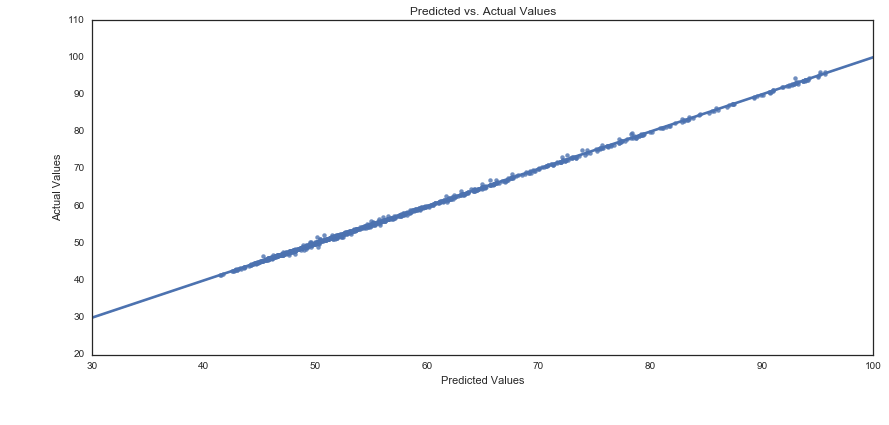

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(y_pred, y_true)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

## Get the coefficients (betas)

In [377]:
# each feature has an associated coefficient
len(lr_model.coef_)

9

In [378]:
# we can retrieve those
lr_model.coef_

array([  2.98166897e-01,   6.88080180e-02,   3.01244327e-01,
         3.04071075e-01,   2.56568348e-02,   9.34685651e-07,
         2.98748135e-04,   3.16131949e-03,  -6.20311840e-02])

## Mean abs. value of the coefficients

In [379]:
abs(lr_model.coef_).mean()

0.11815992643596893

In [380]:
lr_model.coef_.max()

0.30407107502381975

## Let's re-model it using regularization

In [381]:
# we'll use LASSO, aka L1
lasso = linear_model.Lasso(alpha=1)

In [382]:
# next we fit
lasso_model = lasso.fit(X, y)

## Get the r<sup>2</sup>

In [383]:
y_true_lasso = y
y_pred_lasso = lasso_model.predict(X)

lasso_r2 =  r2_score(y_true=y_true_lasso, y_pred=y_pred_lasso)

In [384]:
lasso_r2

0.99945249972842143

## Get the coefficients (betas)

In [385]:
len(lasso_model.coef_)

9

In [386]:
lasso_model.coef_

array([  2.95315589e-01,   6.69807287e-02,   3.03580106e-01,
         2.98731925e-01,   2.25992089e-02,  -1.74850040e-06,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00])

## Mean of absolute value of the coefficients

In [387]:
abs(lasso_model.coef_).mean()

0.10968992297619996

In [388]:
lasso_model.coef_.max()

0.30358010602178431

In [389]:
from sklearn.metrics import mean_squared_error
print "MSE Lasso:", mean_squared_error(y_true_lasso, y_pred_lasso)
print "MSE linear:", mean_squared_error(y_true, y_pred)


MSE Lasso: 0.0900244642727
MSE linear: 0.0715961570018


In [390]:
# we'll use RIdge, aka L2
ridge = linear_model.Ridge(alpha=1)

In [391]:
# next we fit
ridge_model = ridge.fit(X, y)

In [392]:
y_true_ridge = y
y_pred_ridge = ridge_model.predict(X)

ridge_r2 =  r2_score(y_true=y_true_ridge, y_pred=y_pred_ridge)

In [393]:
ridge_r2

0.99956457482833694

In [394]:
len(ridge_model.coef_)

9

In [395]:
ridge_model.coef_

array([  2.98166011e-01,   6.88064060e-02,   3.01244520e-01,
         3.04068898e-01,   2.56565599e-02,   9.34576768e-07,
         2.98062203e-04,   3.16434550e-03,  -6.19869250e-02])

In [396]:
abs(ridge_model.coef_).mean()

0.11815474029386393

In [397]:
ridge_model.coef_.max()

0.30406889807970805

In [398]:
print "MSE linear:", mean_squared_error(y_true, y_pred)
print "MSE Lasso:", mean_squared_error(y_true_lasso, y_pred_lasso)
print "MSE Ridge:", mean_squared_error(y_true_ridge, y_pred_ridge)


MSE linear: 0.0715961570018
MSE Lasso: 0.0900244642727
MSE Ridge: 0.0715961613988


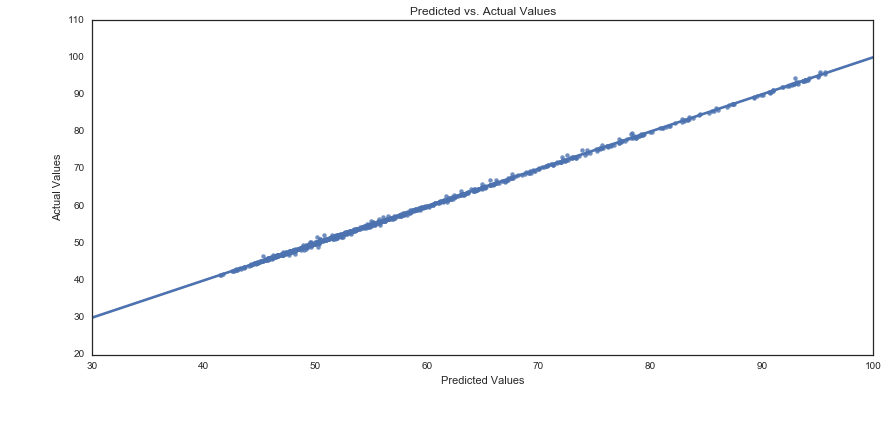

In [399]:
ax = sns.regplot(y_pred_ridge, y_true_ridge)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

In [400]:
len(y_pred_ridge)

846

In [403]:
score_2016 = df.drop(['total_score','world_rank','country', 'university_name'], axis=1)

score_2016['total_score'] = pd.Series(ridge_model.predict(score_2016))

In [ ]:
y_hat.to_csv('ranking-submission.csv')

In [404]:
score_2016['university_name'] = df['university_name']

In [ ]:
score_2016['world_rank'] = 

In [405]:
df2.drop(['total_score'], axis=1, inplace=True)

In [ ]:
score_2016['world_rank'] = score_2016.index+1

In [410]:
score_2016[['university_name', 'total_score']]

,university_name,total_score
0,Harvard University,95.619624
1,California Institute of Technology,95.173441
2,Massachusetts Institute of Technology,95.246341
3,Stanford University,92.941764
5,University of Cambridge,90.979629
6,University of Oxford,90.818615
8,Imperial College London,83.465518
12,Johns Hopkins University,79.157266
13,Cornell University,78.725935
15,University of Michigan,75.706430


In [426]:
output = score_2016[['university_name', 'total_score']].drop_duplicates('university_name')

output

out = pd.merge(df2, output, how='left', on='university_name')

out
# output.to_csv('ranking-submission.csv')

,world_rank,university_name,total_score
0,1,California Institute of Technology,95.173441
1,2,University of Oxford,90.818615
2,3,Stanford University,92.941764
3,4,University of Cambridge,90.979629
4,5,Massachusetts Institute of Technology,95.246341
5,6,Harvard University,95.619624
6,7,Princeton University,56.070186
7,8,Imperial College London,83.465518
8,9,ETH Zurich � Swiss Federal Institute of Techno...,NaN
9,10,University of Chicago,NaN
